# Conductor de Protección en bandejas metálicas


## Objeto
El articulo trata de analizar la sección necesariaen el conductor de protección de un ainstalción electrica.


## Hipótesis de Partida
Se trata de una edificación convencional, en el cual no existe ningún requerimiento para la puesta a tierra del edificio que no sea:
    
- limitar la tensión de contacto
- El sistema de distribución de energía eléctrica en el edificio será $TT$



## Intensidad del defecto a tierra
La intensidad que se produce al darse un defecto en el aislamiento en los conductores que discurren por una bandeja metálica puede determinarse a partir de los siguientes datos:
    
- Resistencia de puesta a tierra del edificio ($R_a$)
- Resistencia del neutro del transformador ($R_b$)
- Tensión entre fase y neutro ($U$)

Se supondrá que la impedancia de los conductores que forman el circuito es despreciable frente a las resistencias de puesta a tierra del circuito.
Si agrupamos ambas resistencias obtenemos las resitencia del lazo que se forma en el defecto a tierra $$R_l=R_a+R_b$$
La intensidad del defecto será:
    $$I_d=\frac{U}{R_l}$$


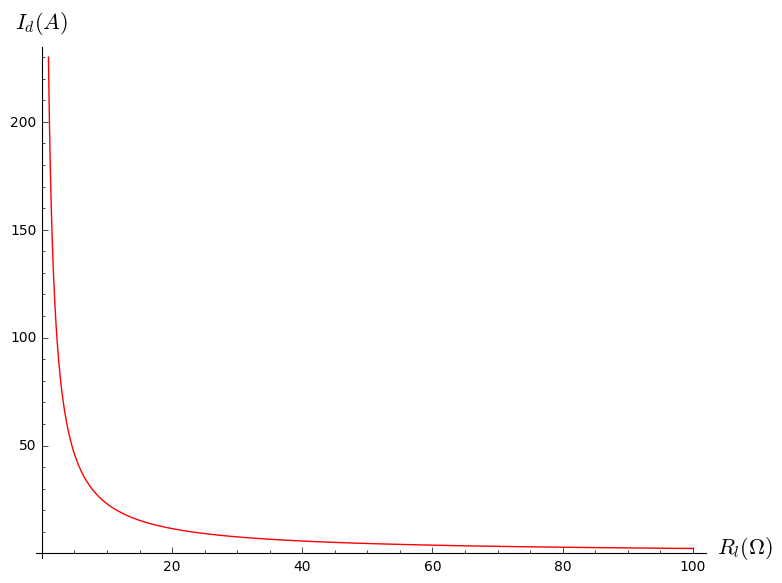

In [1]:
Id(Rl)=230/(Rl)
p1=plot(Id, (Rl, 1, 100),color='red',axes_labels =['$R_l(\Omega)$','$I_d(A)$'],figsize=8)
show (p1)

In [21]:
Id(x)=230/(x)
rl=10.8
pretty_print('Intensidad de Defecto Id(A)=',Id(rl))

'Intensidad de Defecto Id(A)=' 21.2962962962963

## Tiempos de corte máximos
Según la UNE HD 60364-4-41:2007 se establece una un tiempo de corte máximo en caso de falta para sistemas $TT$ con una tensión $U=230V$ de $0.07s$.

## Factor k del conductor
El factor k mide la capacidad del conductor de mantener la corriente que circula en caso de defecto con baja impedancia.
El factor k viene determinado por la expresión
$$k=\sqrt{\frac{Q_c(\beta+20ºC)}{\rho_{20}}ln(1+\frac{\theta_f-\theta_i}{\beta+\theta_i})}$$
siendo:
    
* $Q_c$ la capacidad volumetrica de transmisión de calor del conductor en $\frac{J}{ºCmm^3}$ 
* $\rho_{20}$ la resistividad del conductor a $20ºC$ en $\Omega$
* $\theta_i$ la temperatura inicial del conductor en $ºC$
* $\theta_f$ la temperatura final del conductor en $ºC$
* $\beta$ el inverso del coeficiente de temperatura de la resistencia del conductor en $ºC$

A continuación se muestran los valores para el cobre

| Material | $\beta$ | $Q_c$  | $\rho_{20}$ |
| ------------- | :----------: | :---------: | :---------: |
| Cobre  | $234.5$  |$3.45x10^{-3}$ | $17.241x10^{-6}$ |
| Aluminio  | $228$ | $2.5x10^{-3}$ | $28.264x10^{-6}$|

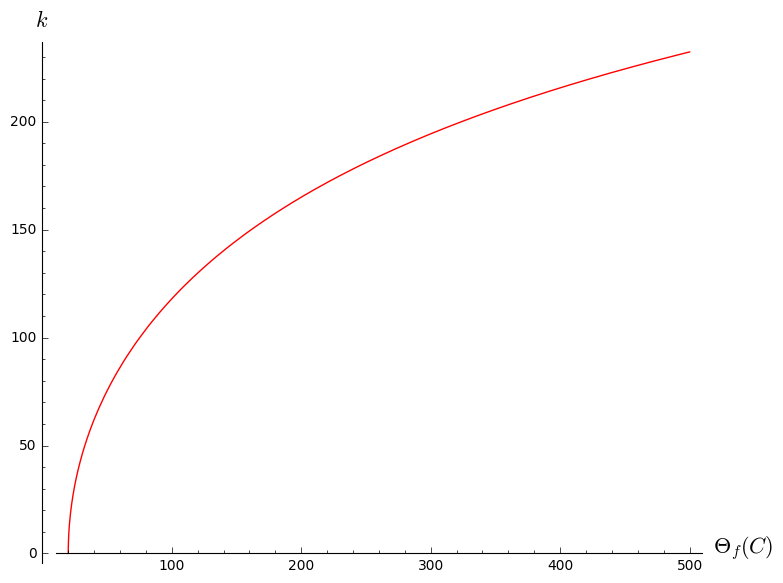

In [3]:
beta_cu=234.5
beta_al=228

Qc_cu=3.45e-3
Qc_al=2.5e-3

ro_cu=17.241*10^-6
ro_al=28.264*10^-6

Ti=20
kcu(Tf)=sqrt(Qc_cu*(beta_cu+20)/ro_cu*ln(1+(Tf-Ti)/(beta_cu+Ti)))


graf1=plot(kcu, (Tf, 20, 500),color='red',axes_labels =['$\Theta_f(C)$','$k$'])


show (graf1)


In [17]:
Tf=150
print 'Para una Temperatura final del conductor de $150ºC$ obtenemos un valor k para el cobre de ',kcu(Tf)

Para una Temperatura final del conductor de $150ºC$ obtenemos un valor k para el cobre de  144.963755426510


## Sección del condcutor de Protección
Según la UNE HD 60364-5-54:2007 se establece que la sección del condcutor de protección se puede determinar para tiempos de corte inferiores a 5 s según:
        
$$S=\frac{\sqrt{I^2t}}{k}$$
siendo:
    
* $k$ el factor k del conductor  
* $t$ el tiempo de despeje de la falta en $s$
* $I$ la intensidad de la falta en $A$



In [24]:
t=0.07

print "Tiempo de disparo de la protección",t
print "Intensidad de la falta",Id(rl)
print "Factor k",kcu(150)
S=sqrt(Id(rl)^2*t)/kcu(150)
print "Sección del conductor",S,"mm2"

Tiempo de disparo de la protección 1
Intensidad de la falta 21.2962962962963
Factor k 144.963755426510
Sección del conductor 0.146907730374663 mm2


De acuerdo con la UNE HD 60364-5-54:2007 se establece que la sección mínima del conductor de protección no será inferior a $4mm^2$ al estar expuesta la bandeja a daños mecánicos.
        